In [ ]:
pip install lightkurve

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.9/265.9 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 888.9/888.9 kB 22.1 MB/s eta 0:00:00
  Created wheel for fbpca: filename=fbpca-1.0-py3-none-any.whl size=11374 sha256=a06e6314e70291037cc89279c74555beb59461c14f0c190a1036351a8b88eb56
  Stored in directory: /root/.cache/pip/wheels/3c/ea/60/8d1c9fbbc99492a1775b36a5e29c8c1ef309cc5821bd5a219d
  Created wheel for memoization: filename=memoization-0.4.0-py3-none-any.whl size=50452 sha256=19dc6d7110057ebcd51d7f46c9c048e64ffc5a35c3d831d3d1892b147a53198b
  Stored in directory: /root/.cache/pip/wheels/3e/b8/c5/b553

## Importing Selected KOIs

In [ ]:
%matplotlib inline
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.wcs import WCS
from astropy.table import Table
import numpy as np
import pandas as pd

# KOI confirmed and candidate exoplanet systems
host_stars = pd.read_csv('/content/drive/MyDrive/CS464_Project/koi_pc.csv')

# KOI binary star false positives
binary_stars = pd.read_csv('/content/drive/MyDrive/CS464_Project/koi_binary_stars.csv')

In [ ]:
host_stars # KOI confirmed and candidate exoplanet systems having exactly one TCE entry

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,10872983,K00756.01,Kepler-228 d,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4699,9938836,K07978.01,NaN,CANDIDATE,CANDIDATE,0.843,0,0,0,0,...,-242.0,3.890,0.405,-0.135,2.219,0.536,-0.996,285.30768,46.829803,13.729
4700,10011213,K07982.01,NaN,CANDIDATE,CANDIDATE,0.189,0,0,0,0,...,-225.0,4.488,0.054,-0.216,0.955,0.291,-0.097,291.60455,46.973289,15.632
4701,10028127,K08193.01,NaN,CANDIDATE,CANDIDATE,0.519,0,0,0,0,...,-166.0,4.561,0.030,-0.170,0.855,0.207,-0.069,297.73398,46.961529,15.719
4702,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,0,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757


In [ ]:
binary_stars # KOI dispositioned as FALSE POSITIVE and includes the koi_fpflag_ss indicating an eclipsing binary system.

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.0,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
1,6721123,K00114.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.0,0,1,1,0,...,-124.0,3.986,0.182,-0.098,1.958,0.322,-0.483,298.86435,42.151569,12.660
2,10419211,K00742.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.0,0,1,0,0,...,-172.0,4.554,0.033,-0.176,0.848,0.224,-0.075,297.07993,47.597401,15.472
3,10464078,K00743.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.0,0,1,0,0,...,-151.0,4.591,0.072,-0.048,0.680,0.072,-0.065,289.25821,47.635319,15.487
4,10480982,K00744.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.0,0,1,0,0,...,-200.0,4.496,0.052,-0.208,0.947,0.308,-0.096,295.81454,47.690350,15.341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2205,3443582,K08087.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.0,0,1,0,0,...,0.0,4.152,0.000,0.000,2.404,0.000,0.000,291.42249,38.535229,15.799
2206,9899449,K08190.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.0,0,1,1,1,...,-217.0,4.494,0.054,-0.216,0.958,0.300,-0.100,295.24326,46.794891,15.625
2207,9912977,K07977.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.0,0,1,0,0,...,-195.0,4.126,0.338,-0.182,1.365,0.381,-0.466,299.42685,46.700150,13.726
2208,4371172,K08093.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.0,0,1,1,0,...,-167.0,3.878,0.665,-0.285,1.895,0.912,-1.114,293.22186,39.430443,13.791


In [ ]:
print(binary_stars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2210 entries, 0 to 2209
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              2210 non-null   int64  
 1   kepoi_name         2210 non-null   object 
 2   kepler_name        1 non-null      object 
 3   koi_disposition    2210 non-null   object 
 4   koi_pdisposition   2210 non-null   object 
 5   koi_score          2141 non-null   float64
 6   koi_fpflag_nt      2210 non-null   int64  
 7   koi_fpflag_ss      2210 non-null   int64  
 8   koi_fpflag_co      2210 non-null   int64  
 9   koi_fpflag_ec      2210 non-null   int64  
 10  koi_period         2210 non-null   float64
 11  koi_period_err1    2171 non-null   float64
 12  koi_period_err2    2171 non-null   float64
 13  koi_time0bk        2210 non-null   float64
 14  koi_time0bk_err1   2171 non-null   float64
 15  koi_time0bk_err2   2171 non-null   float64
 16  koi_impact         2186 

In [ ]:
# There is some class imbalance here that may need to be addressed
print(f"Shape of host_stars: {host_stars.shape}")
print(f"Shape of binary_stars: {binary_stars.shape}")

Shape of host_stars: (4704, 49)
Shape of binary_stars: (2210, 49)


In [ ]:
pcs = host_stars[['kepid', 'koi_period', 'koi_time0bk', 'koi_duration', 'ra', 'dec']].rename(
    columns={'koi_period': 'period', 'koi_time0bk': 't0', 'koi_duration': 'duration'}
)

npcs = binary_stars[['kepid', 'koi_period', 'koi_time0bk', 'koi_duration', 'ra', 'dec']].rename(
    columns={'koi_period': 'period', 'koi_time0bk': 't0', 'koi_duration': 'duration'}
)

pcs

,kepid,period,t0,duration,ra,dec
0,10797460,9.488036,170.538750,2.9575,291.93423,48.141651
1,10797460,54.418383,162.513840,4.5070,291.93423,48.141651
2,10811496,19.899140,175.850252,1.7822,297.00482,48.134129
3,10854555,2.525592,171.595550,1.6545,288.75488,48.226200
4,10872983,11.094321,171.201160,4.5945,296.28613,48.224670
...,...,...,...,...,...,...
4699,9938836,7.268182,135.934800,4.9850,285.30768,46.829803
4700,10011213,376.379890,486.602200,13.9900,291.60455,46.973289
4701,10028127,367.947848,416.209980,4.2490,297.73398,46.961529
4702,10128825,1.739849,133.001270,3.1140,286.50937,47.163219


## Demonstrating Plotting Targets with World Coordinate System

In [ ]:
_# Select one region from the ffi hdulist
filename = '/content/drive/MyDrive/CS464_Project/ffi/kplr2013098115308_ffi-cal.fits'

selected_region = 3

with fits.open(filename) as hdulist:
    hdu = hdulist[selected_region]
    header = hdu.header
    imgdata = hdu.data



# print(repr(header[54:60]))
img_ra = header['CRVAL1']
img_dec = header['CRVAL2']
print(f"Ra (deg): {img_ra}")
print(f"Dec (deg): {img_dec}")

Ra (deg): 288.13970969368125
Dec (deg): 50.99029510176317


In [ ]:
print(repr(header[54:61]))

WCSAXES =                    2 / number of WCS axes                             
CTYPE1  = 'RA---TAN-SIP'       / Gnomonic projection + SIP distortions          
CTYPE2  = 'DEC--TAN-SIP'       / Gnomonic projection + SIP distortions          
CRVAL1  =   288.13970969368125 / RA at CRPIX1, CRPIX2                           
CRVAL2  =    50.99029510176317 / DEC at CRPIX1, CRPIX2                          
CRPIX1  =                533.0 / X reference pixel                              
CRPIX2  =                521.0 / Y reference pixel                              


In [ ]:
print(len(imgdata))
print(imgdata)

1070
[[ 6.0934387e+01  9.0023766e+00 -1.7052355e+01 ...  2.9539888e+00
   8.3530557e-01  2.5614960e+00]
 [ 1.9677040e+01  1.8431516e+00 -1.6942499e+01 ...  2.8241291e+00
   1.1587973e-01  1.6476403e-04]
 [ 1.9204330e+01  4.2051396e+00 -2.1212383e+01 ...  2.4023458e-02
   4.0530868e+00  2.4580874e+00]
 ...
 [-3.2174661e+02 -1.2388550e+01 -4.6263661e+00 ... -1.1015452e+00
   2.7119538e-01 -6.2767458e-01]
 [-3.2161591e+02 -6.8696237e+00 -3.7190590e+00 ... -1.6502666e+00
  -1.3900479e+00  5.3622705e-01]
 [-3.2174728e+02 -8.4395208e+00 -2.0632385e+01 ... -3.0411035e-01
   4.1463345e-01  1.7622612e+00]]


In [ ]:
def haversine(ra1, dec1, ra2, dec2):
    """
    Calculate the great-circle distance between two points on the celestial sphere
    using the Haversine formula.

    Parameters:
    - ra1, dec1: RA and Dec of the first point in degrees.
    - ra2, dec2: RA and Dec of the second point in degrees.

    Returns:
    - Distance in degrees.
    """

    ra1_rad = np.radians(ra1)
    dec1_rad = np.radians(dec1)
    ra2_rad = np.radians(ra2)
    dec2_rad = np.radians(dec2)

    d_ra = ra2_rad - ra1_rad
    d_dec = dec2_rad - dec1_rad

    a = np.sin(d_dec / 2) ** 2 + np.cos(dec1_rad) * np.cos(dec2_rad) * np.sin(d_ra / 2) ** 2
    c = 2 * np.arcsin(np.sqrt(a))

    distance_deg = np.degrees(c)
    return distance_deg

def select_coordinates_within_radius(center_ra, center_dec, df, radius_deg):
    """
    Select pairs of coordinates (RA and Dec) from a DataFrame within a specified radius of a center point.

    Parameters:
    - center_ra, center_dec: RA and Dec of the center point in degrees.
    - df: DataFrame containing columns 'id', 'ra', and 'dec'.
    - radius_deg: Radius in degrees.

    Returns:
    - DataFrame containing selected rows.
    """
    distances = haversine(center_ra, center_dec, df['ra'], df['dec'])
    selected_rows = df[distances <= radius_deg]
    return selected_rows



In [ ]:
import lightkurve as lk


# Specify the desired radius in degrees for a cone search
radius_deg = 0.7

aoi_pc = select_coordinates_within_radius(img_ra, img_dec, pcs, radius_deg)
aoi_npc = select_coordinates_within_radius(img_ra, img_dec, npcs, radius_deg)


In [ ]:
aoi_npc

,kepid,period,t0,duration,ra,dec
229,12504988,5.093939,139.717839,3.93144,288.25284,51.417332
1987,12105785,31.953039,142.708054,8.04610,288.48740,50.675461
2027,12251779,14.844240,134.233769,6.83577,287.57361,50.998730
2029,12302391,25.321699,139.687525,4.45367,288.40378,51.073761
2031,12351927,10.116145,139.982497,2.70314,288.51062,51.162472
2202,12453855,0.559644,131.517134,0.67700,287.71039,51.317638


Set MJD-END to 56390.495238 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 56390.495238 from DATE-END'.


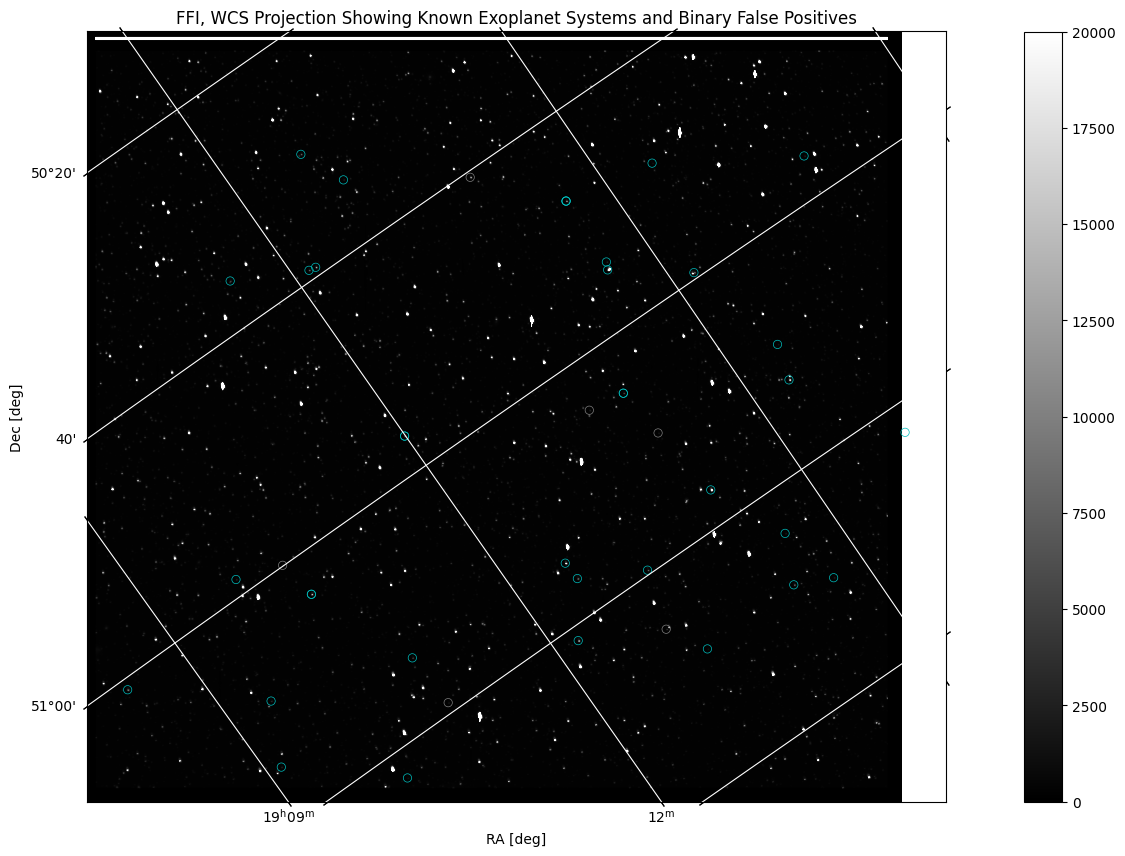

In [ ]:
# plotting host stars in our FFI

filename = '/content/drive/MyDrive/CS464_Project/ffi/kplr2013098115308_ffi-cal.fits'
hdu = fits.open(filename)[selected_region]
wcs = WCS(hdu.header)

fig = plt.figure(figsize=(20,10))
ax = plt.subplot(projection=wcs)
im = ax.imshow(hdu.data, cmap=plt.cm.gray, origin='lower', clim=(0, 20000), extent=(0, hdu.data.shape[1], 0, hdu.data.shape[0]))
fig.colorbar(im)

plt.title('FFI, WCS Projection Showing Known Exoplanet Systems and Binary False Positives')
ax.set_xlabel('RA [deg]')
ax.set_ylabel('Dec [deg]')
ax.grid(color='white', ls='solid')
ax.autoscale = False


ax.scatter(aoi_pc['ra'], aoi_pc['dec'],
           facecolors='none', edgecolors='c', linewidths=0.5,
           transform=ax.get_transform('icrs')) # This is needed when projecting onto axes with WCS info

ax.scatter(aoi_npc['ra'], aoi_npc['dec'],
           facecolors='none', edgecolors='gray', linewidths=0.5,
           transform=ax.get_transform('icrs')) # This is needed when projecting onto axes with WCS info


## Generating the Dataset / Light Curve Preprocessing

In [ ]:
def get_dataframe(bins):
  n_flux = bins
  flux_cols = [f'flux_{i}' for i in range(1, n_flux + 1)]

  label_col = ['label']
  id_col = ['kepid']

  all_columns = id_col + flux_cols + label_col
  df = pd.DataFrame(columns=all_columns)

  return df

def generate_dataset(aoi_pc, aoi_npc, iter_start, iter_end, bins):
  df = get_dataframe(bins)

  for target_idx in range(iter_start, iter_end):

    if (target_idx < len(aoi_pc)):
      target_pc = aoi_pc.iloc[target_idx]
      entry = to_flux_time_series(target_pc, bins)
      new_entry = np.concatenate([[target_pc.kepid], entry, [1]])
      df = df.append(pd.Series(new_entry, index=df.columns), ignore_index=True)


    if (target_idx < len(aoi_npc)):
      target_npc = aoi_npc.iloc[target_idx]
      entry = to_flux_time_series(target_npc, bins)
      new_entry = np.concatenate([[target_npc.kepid], entry, [0]])
      df = df.append(pd.Series(new_entry, index=df.columns), ignore_index=True)
  return df

def to_flux_time_series(target, bins):
  period = target.period
  t0 = target.t0
  duration = target.duration

  search_results = lk.search_lightcurve(target.kepid, mission="Kepler", author="Kepler",cadence='long', limit=4)
  lc_collection = search_results.download_all() # 4 quarters to minimize computational load
  lc = lc_collection.stitch()
  lc_cleaned = lc.remove_outliers(sigma=20, sigma_upper=4).remove_nans()
  flat_lc = lc_cleaned.flatten(window_length=401)
  lc_fold = flat_lc.fold(period, epoch_time=t0)
  time_bin_size = (0.001 * (lc_fold.time[-1].value - lc_fold.time[0].value))
  binned_lc = lc_fold.bin(time_bin_size=time_bin_size, n_bins=1000, aggregate_func=np.nanmean)

  return binned_lc.flux.value

def plot_entry(entry):
  # Plot the flux values for each entry
    flux_values = entry[1:-1]  # Exclude the first (kepid) and last (label) column
    cls = entry['label']

    plt.style.use('seaborn-v0_8-dark')


    # Plot flux values
    if (cls == 1.0):
      label = 'Exoplanet Transit'
    else:
      label = 'Binary System Transit'
    plt.plot(flux_values, label=f"Label: {label}", color="#d6ff0")

    # Add labels and legend
    plt.ylabel('Normalized Flux')
    plt.legend()
    plt.title(f'Time series flux data for KIC {entry.kepid}')

    # Remove x-axis ticks
    plt.xticks([])

    plt.show()


In [ ]:

# generate a dataset, 5 entries per class and 1000 bins per entry
df = generate_dataset(aoi_pc, aoi_npc, 10, 1000)

df

<ipython-input-131-c1ec83196a44>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(new_entry, index=df.columns), ignore_index=True)
<ipython-input-131-c1ec83196a44>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(new_entry, index=df.columns), ignore_index=True)
<ipython-input-131-c1ec83196a44>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(new_entry, index=df.columns), ignore_index=True)
<ipython-input-131-c1ec83196a44>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(new_entry, index=df.columns), ignore_index=True)
<ipython-input-1

,kepid,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,flux_8,flux_9,...,flux_992,flux_993,flux_994,flux_995,flux_996,flux_997,flux_998,flux_999,flux_1000,label
0,12105051.0,1.000011,1.000089,1.000049,1.000019,1.000022,0.999961,0.999966,0.999985,0.999912,...,0.999904,0.999968,1.000009,1.000023,1.000055,1.000029,0.999981,0.999992,0.999966,1.0
1,12504988.0,0.999262,0.999362,0.999045,0.999116,0.999163,0.999402,0.998965,0.999086,0.999107,...,0.999152,0.999135,0.999350,0.999140,0.999058,0.999011,0.999380,0.999079,0.999035,0.0
2,12252424.0,0.999943,0.999931,0.999962,0.999863,1.000027,0.999984,1.000048,1.000008,0.999977,...,0.999862,0.999958,0.999975,0.999921,1.000034,1.000033,1.000026,0.999943,0.999971,1.0
3,12105785.0,0.999984,0.999960,0.999970,0.999978,0.999988,0.999929,0.999938,0.999979,1.000003,...,0.999951,0.999974,0.999995,1.000006,0.999908,1.000008,1.000028,0.999949,0.999954,0.0
4,12252424.0,0.999873,0.999933,1.000095,0.999978,0.999964,0.999980,1.000041,0.999970,0.999925,...,0.999956,0.999962,0.999991,1.000020,0.999891,1.000040,0.999887,1.000017,0.999974,1.0
5,12251779.0,0.999832,0.999938,1.000158,0.999910,1.000020,0.999955,0.999874,0.999862,0.999971,...,0.999821,1.000010,0.999760,0.999805,0.999905,0.999909,0.999845,0.999679,0.999965,0.0
6,12400538.0,1.000022,1.000144,0.999985,0.999785,0.999935,1.000051,0.999887,1.000014,1.000125,...,1.000024,1.000115,1.000154,0.999955,0.999997,1.000033,0.999861,0.999947,1.000082,1.0
7,12302391.0,0.999900,1.000083,1.000149,0.999942,0.999935,1.000148,0.999776,0.999943,0.999774,...,1.000074,1.000162,0.999947,0.999621,0.999977,0.999878,0.999823,1.000150,1.000209,0.0
8,12403119.0,1.000016,0.999995,1.000004,1.000038,1.000022,1.000033,1.000058,1.000017,1.000013,...,1.000011,1.000013,1.000025,0.999966,1.000014,1.000009,1.000033,0.999955,1.000008,1.0
9,12351927.0,0.999570,0.999935,1.000405,1.000244,1.000201,0.999788,1.000824,1.000135,1.000379,...,0.999231,0.998343,0.996381,0.995482,0.994046,0.994926,0.994980,0.996923,0.997397,0.0


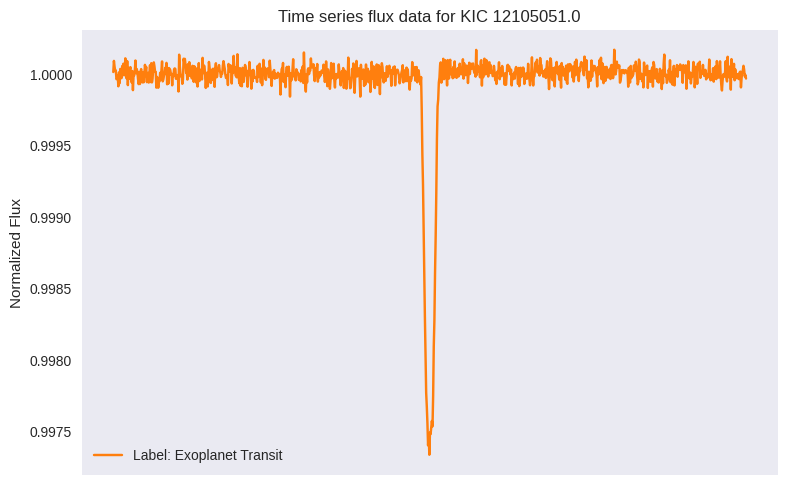

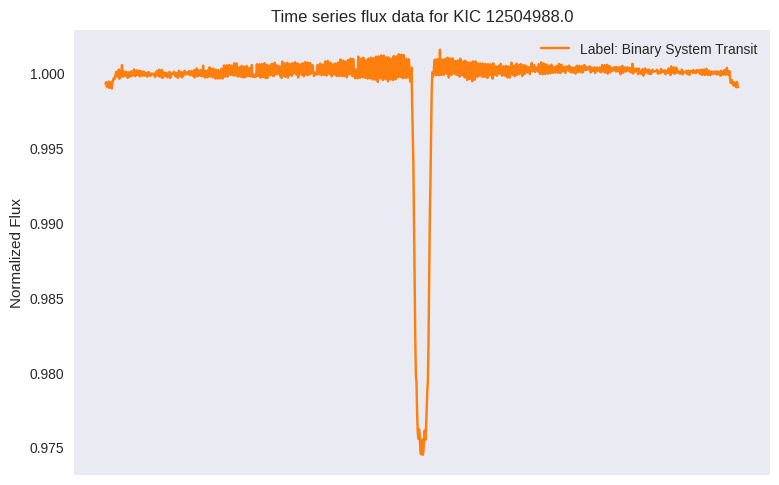

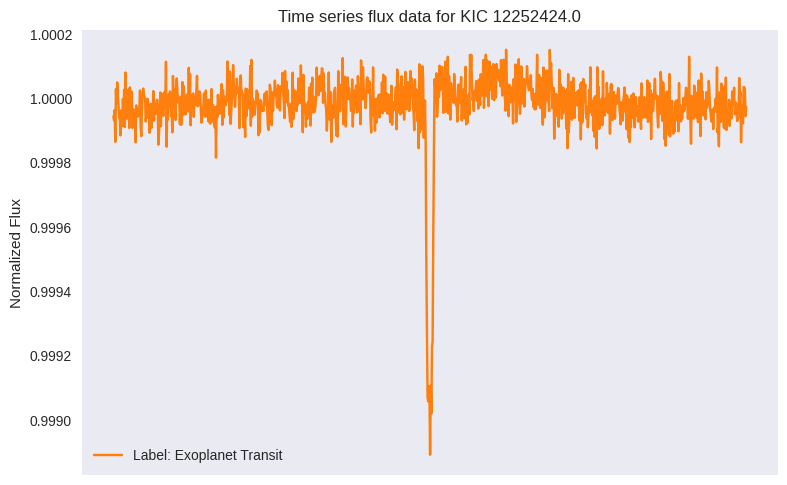

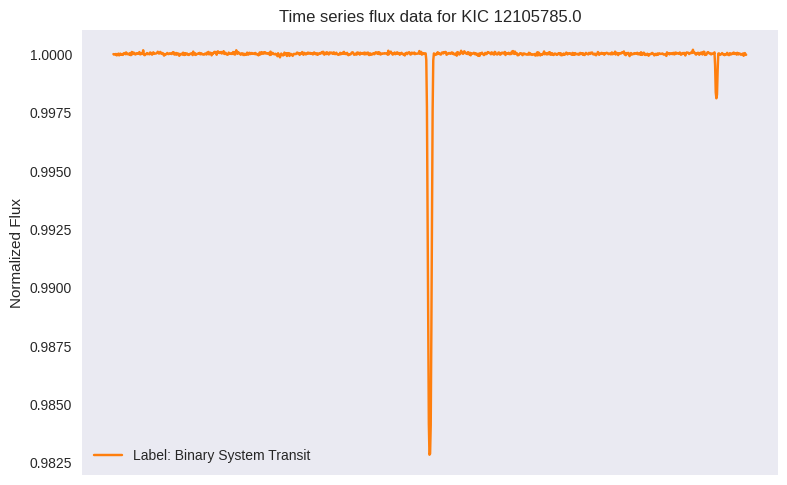

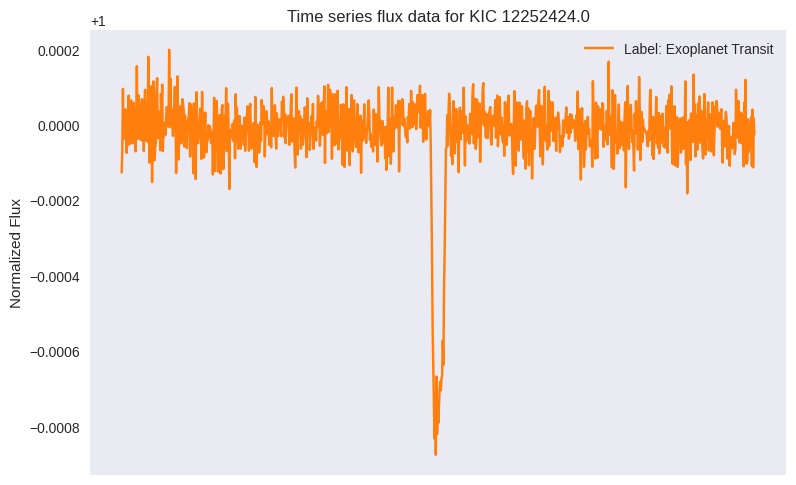

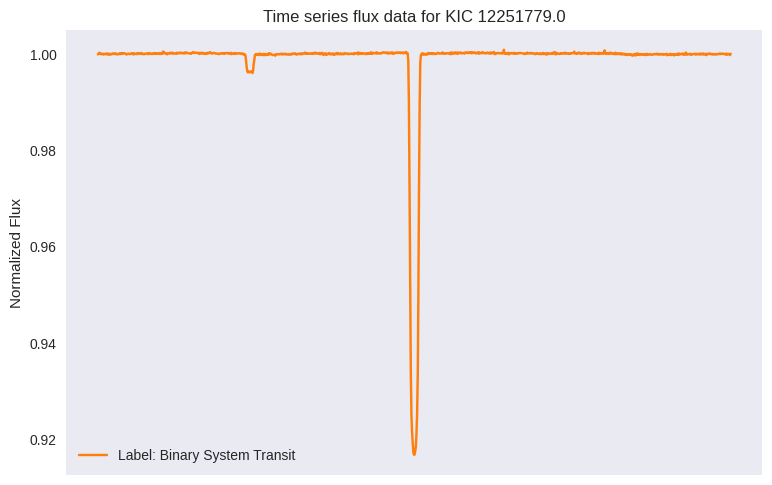

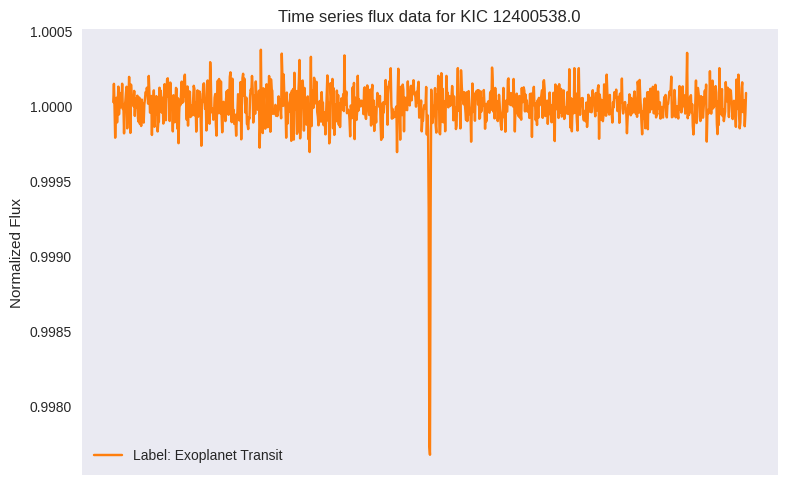

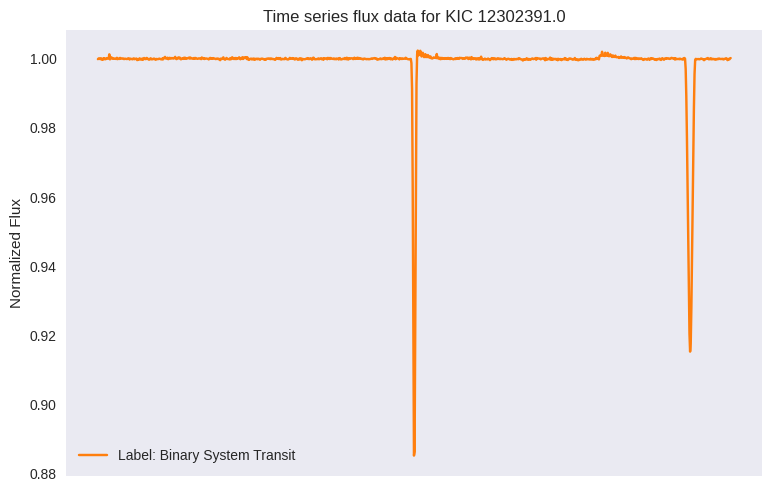

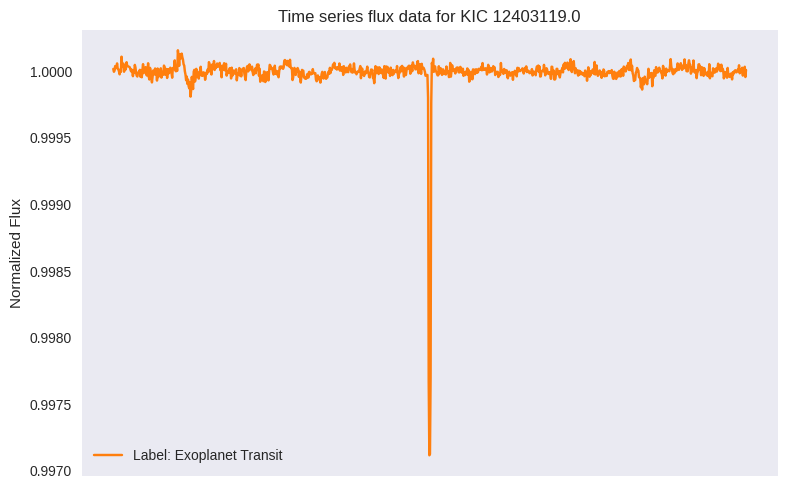

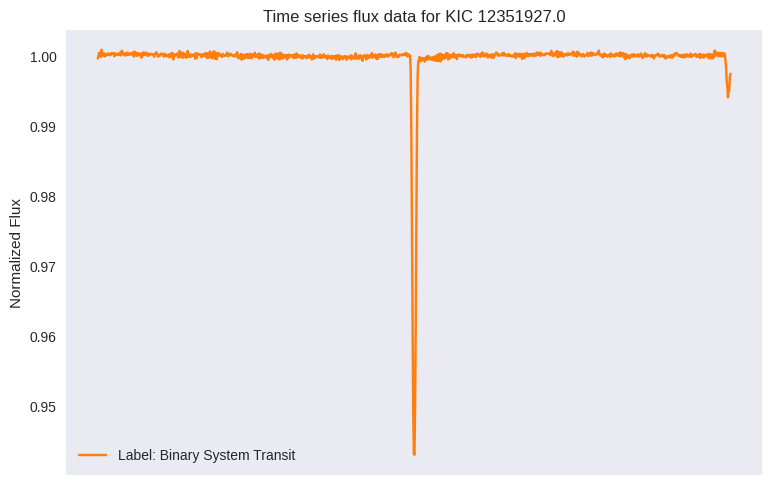

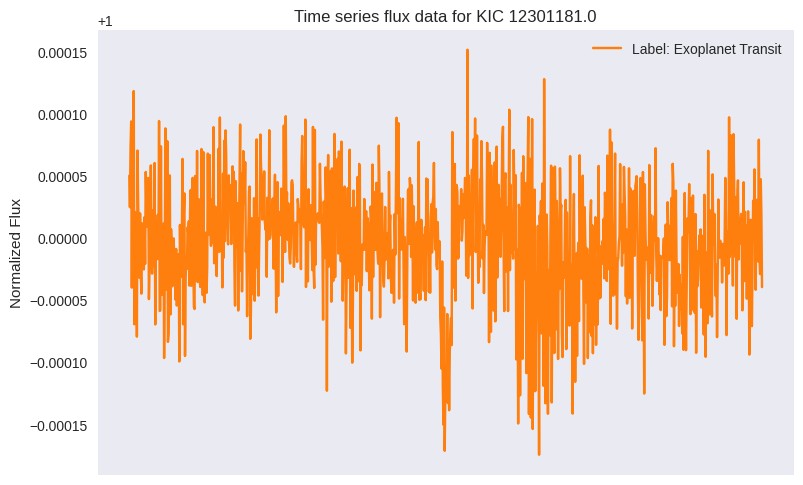

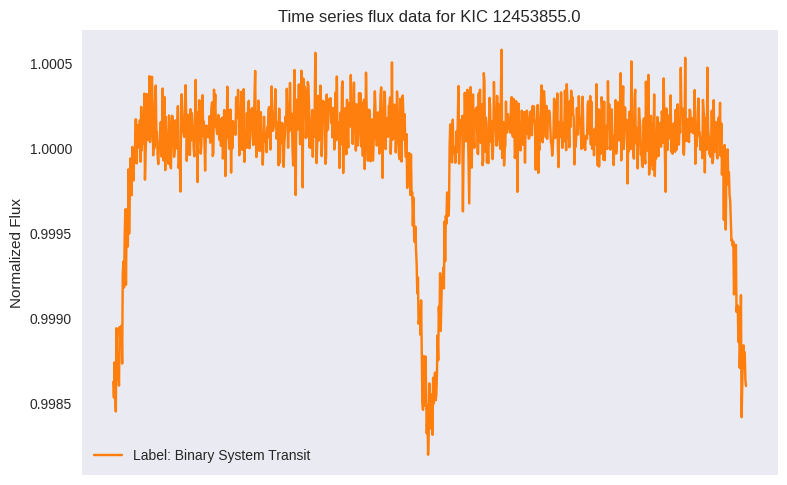

In [ ]:
for i in range(0, len(df)-4):
  plot_entry(df.iloc[i])

In [ ]:
lc.meta # Python dictionary, which has some convenient features.
# ex lk.meta.get('Mission)

In [ ]:
lc.quarter

4

In [ ]:
print(f"shape of planet candidates: {pcs.shape}")
print(f"shape of binary system false positives: {npcs.shape}")

shape of planet candidates: (4704, 6)
shape of binary system false positives: (2210, 6)


In [ ]:
# generate a dataset, 100 entries per class and 1000 bins per entry
baseline_df = generate_dataset(pcs, npcs, 0, 100, 1000)

baseline_df.to_csv('/content/drive/MyDrive/CS464_Project/baseline_df.csv', index=False)

# this took 49 mins 26 s

In [ ]:
baseline_df

,kepid,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,flux_8,flux_9,...,flux_992,flux_993,flux_994,flux_995,flux_996,flux_997,flux_998,flux_999,flux_1000,label
0,10797460.0,0.999956,0.999976,0.999927,0.999900,0.999946,0.999974,0.999817,1.000073,0.999805,...,0.999985,1.000216,0.999849,0.999988,0.999935,0.999952,1.000010,1.000180,0.999846,1.0
1,10848459.0,1.000090,NaN,0.999933,1.000010,1.000484,1.000211,0.999942,1.000306,1.000175,...,1.000171,1.000071,1.000015,1.000282,1.000190,0.999994,1.000019,1.000038,1.000262,0.0
2,10797460.0,1.000086,1.000074,0.999959,1.000018,1.000172,0.999981,0.999912,1.000094,1.000037,...,1.000001,0.999999,0.999876,1.000060,0.999987,0.999778,0.999984,1.000067,0.999960,1.0
3,6721123.0,0.999984,1.000008,0.999981,0.999999,0.999918,0.999998,0.999958,0.999988,0.999988,...,1.000084,0.999993,1.000052,1.000010,0.999980,0.999998,1.000053,0.999989,0.999980,0.0
4,10811496.0,1.000903,1.001195,1.000961,1.000900,1.001421,1.001033,1.001075,1.000885,1.001231,...,1.000613,1.000885,1.000414,1.000970,1.000982,1.001035,1.000859,1.000877,1.001111,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,8374494.0,0.999259,0.999254,0.997780,0.998377,0.999700,0.998827,0.997396,0.998644,0.999418,...,0.999771,1.000016,0.999995,0.998992,0.999086,0.999661,0.999572,0.998314,0.998237,0.0
196,5792202.0,0.999396,0.999464,0.999717,0.999420,0.999084,0.999239,0.999501,0.999534,0.999186,...,0.999374,0.999360,0.999368,0.999267,0.999324,0.999298,0.999499,0.999463,0.999709,1.0
197,2438502.0,1.002866,1.002534,1.001802,1.005692,1.000341,1.004028,1.001305,1.001941,1.004274,...,1.004676,1.001779,1.003541,1.002673,1.002084,1.003098,1.002127,1.002652,1.002153,0.0
198,10875245.0,1.000014,0.999961,0.999954,0.999970,0.999994,1.000031,0.999981,0.999944,1.000051,...,0.999993,0.999983,1.000022,0.999961,1.000032,0.999977,0.999951,1.000034,0.999965,1.0


In [ ]:
baseline_df2 = generate_dataset(pcs, npcs, 151, 200, 1000)
# next will be generate_dataset(pcs, npcs, 151, 200, 1000)
# next will be generate_dataset(pcs, npcs, 200, 300, 1000)

<ipython-input-170-6bbdaf415e76>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(new_entry, index=df.columns), ignore_index=True)
<ipython-input-170-6bbdaf415e76>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(new_entry, index=df.columns), ignore_index=True)
<ipython-input-170-6bbdaf415e76>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(new_entry, index=df.columns), ignore_index=True)
<ipython-input-170-6bbdaf415e76>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.Series(new_entry, index=df.columns), ignore_index=True)
<ipython-input-1

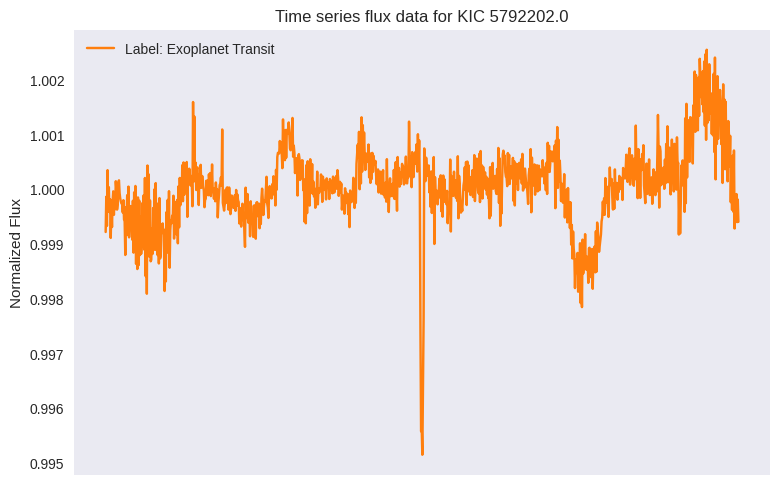

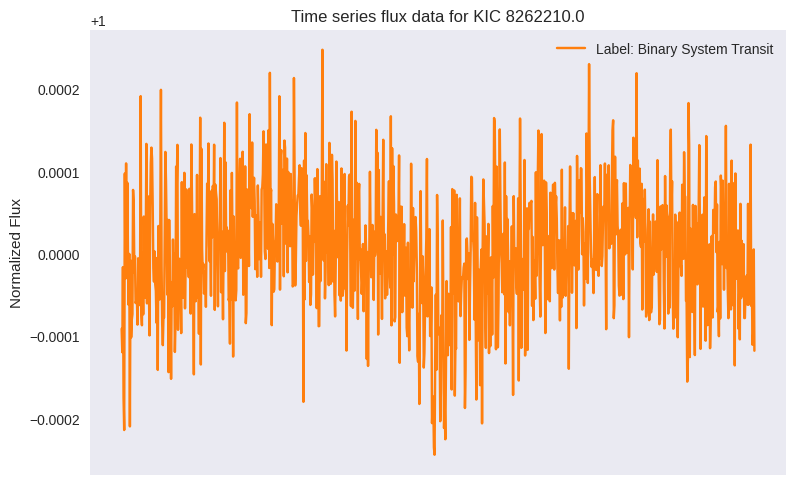

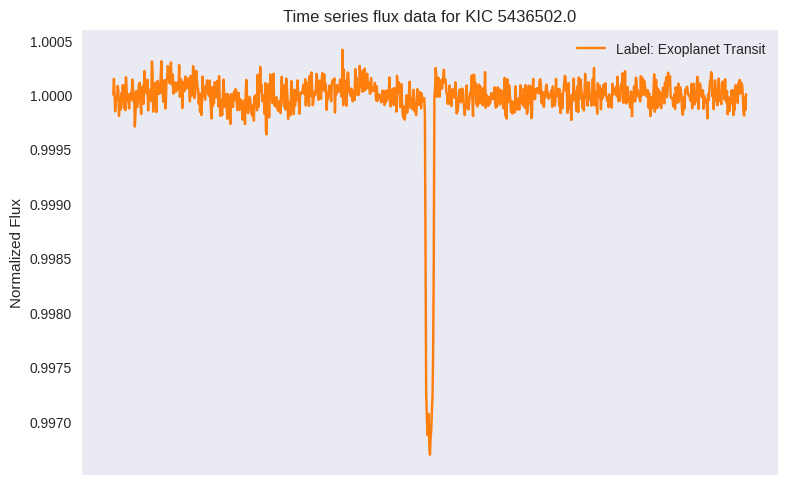

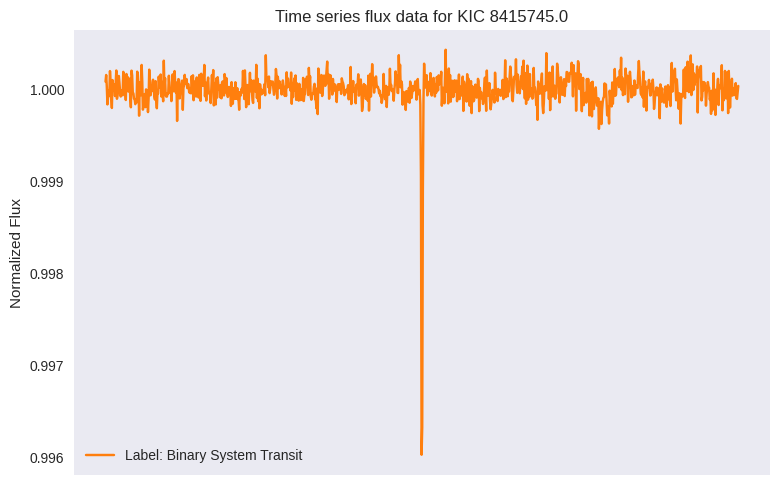

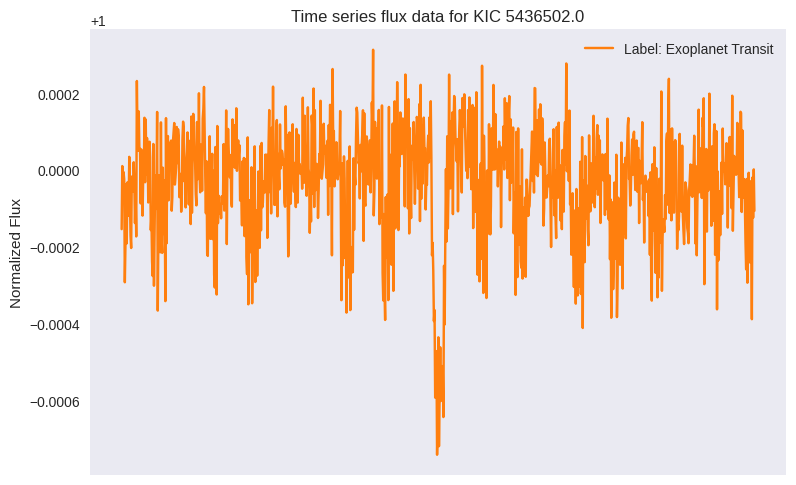

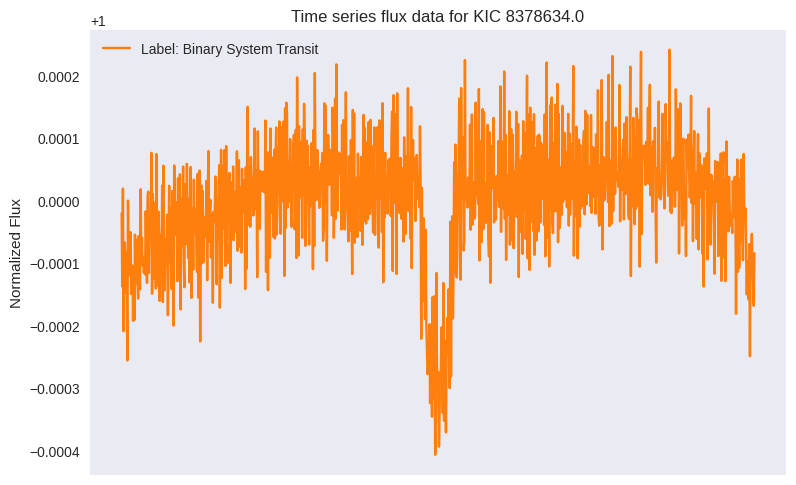

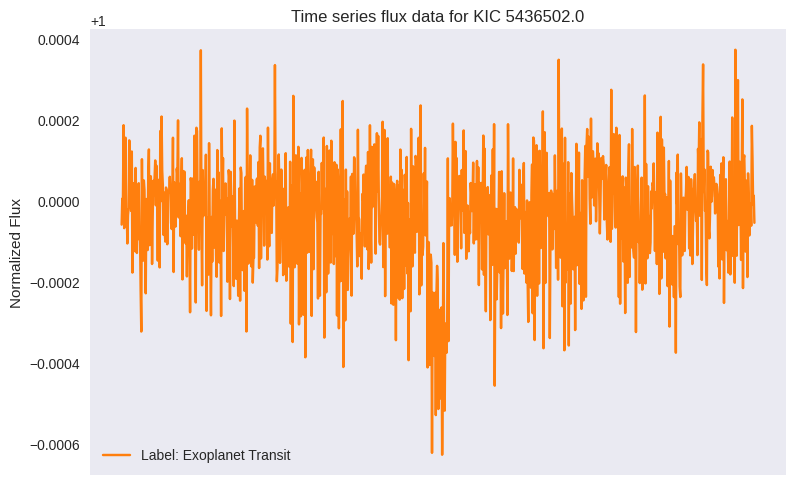

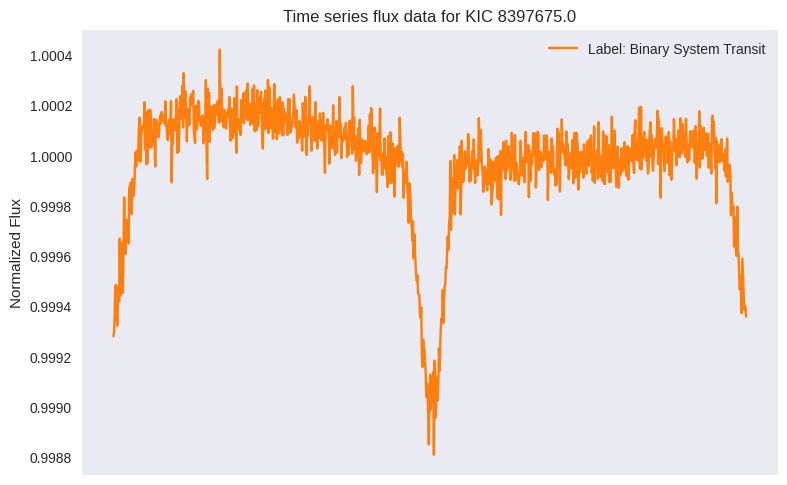

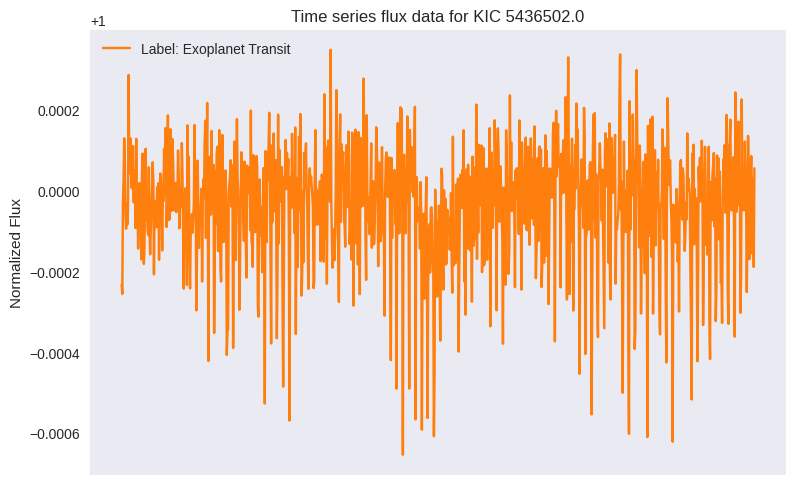

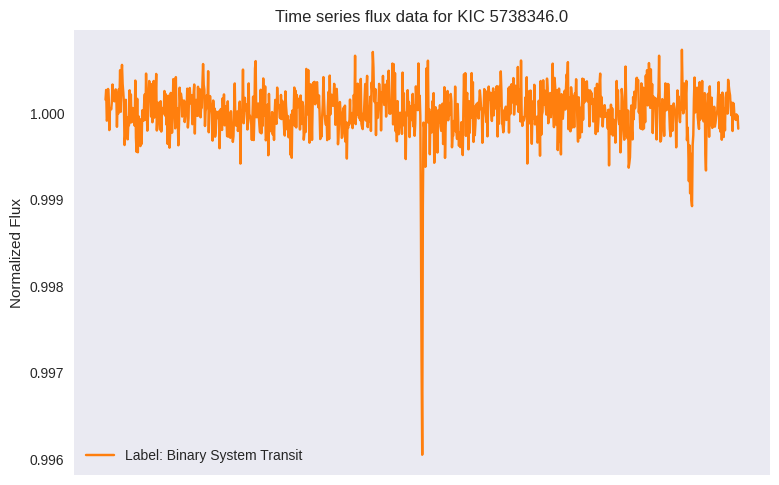

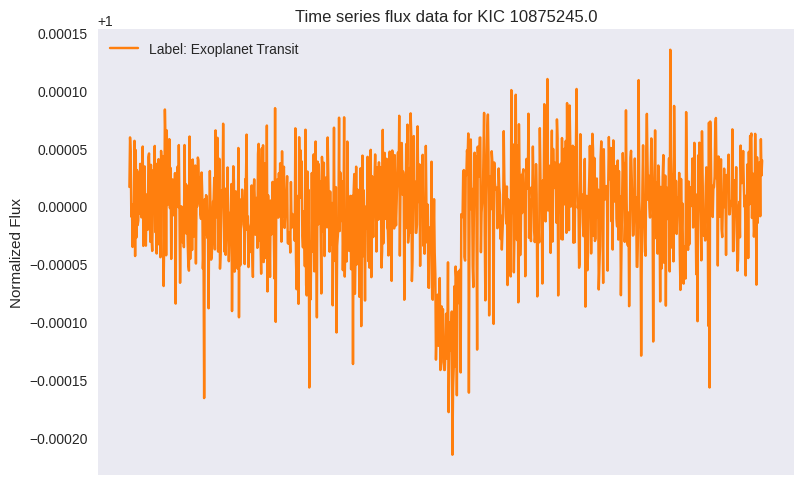

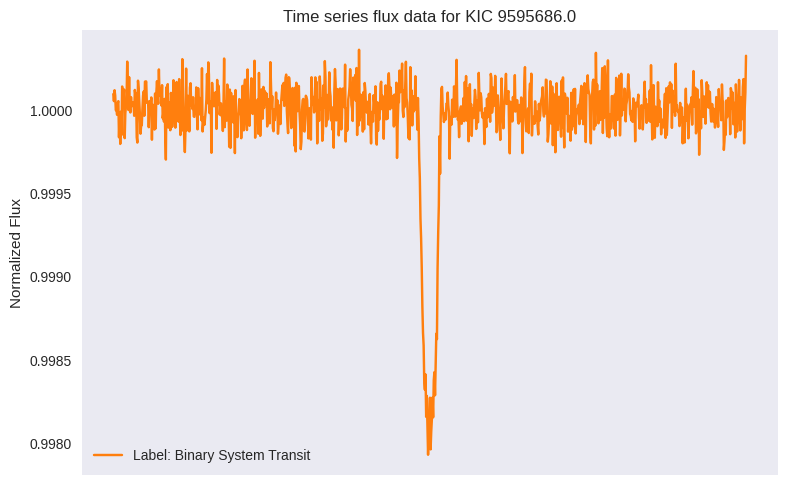

In [ ]:
for i in range(0, len(baseline_df2)-90):
  plot_entry(baseline_df2.iloc[i])

In [ ]:
baseline_df = pd.read_csv
baseline_df = baseline_df.append(baseline_df2, ignore_index=True)

<ipython-input-175-28b7c5c7bd13>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  baseline_df = baseline_df.append(baseline_df2, ignore_index=True)


In [ ]:
baseline_df.to_csv('/content/drive/MyDrive/CS464_Project/baseline_df.csv', index=False)


In [ ]:
baseline_df.shape

(302, 1002)